In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
def simulate_toffoli_circuit(use_cnot=False):
    
    qc = QuantumCircuit(3, 3)
    qc.h(0)  #hadamard on control qubit 1
    qc.h(1)  #hadamard on control qubit 2
    #Toffoli gate q0, q1 control, q2 target
    qc.ccx(0, 1, 2) 
    if use_cnot:
        qc.cx(0, 2)
    qc.measure([0, 1, 2], [0, 1, 2])

    label = "Toffoli + CNOT" if use_cnot else "Toffoli"
    print(f"quantum circuit with {label}:")
    fig, ax = plt.subplots()
    qc.draw('mpl', ax=ax)
    display(fig)
    plt.close(fig)
   
    simulator = AerSimulator(method='automatic')
    result = simulator.run(qc, shots=1024).result()
    counts = result.get_counts(qc)

    print(f"Measurement Results for {label}:")
    fig, ax = plt.subplots()
    plot_histogram(counts, ax=ax)
    display(fig)
    plt.close(fig)

    qc_state = QuantumCircuit(3)
    qc_state.h(0)
    qc_state.h(1)
    qc_state.ccx(0, 1, 2)
    if use_cnot:
        qc_state.cx(0, 2)
    qc_state.save_statevector()

    simulator_state = AerSimulator(method='statevector')
    result_state = simulator_state.run(qc_state).result()
    statevector = result_state.get_statevector(qc_state)

    #Bloch sphere
    print(f"Bloch Sphere for {label}:")
    fig = plot_bloch_multivector(statevector)
    display(fig)
    plt.close()

quantum circuit with Toffoli:


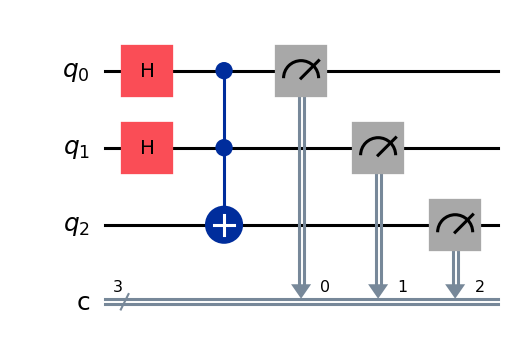

Measurement Results for Toffoli:


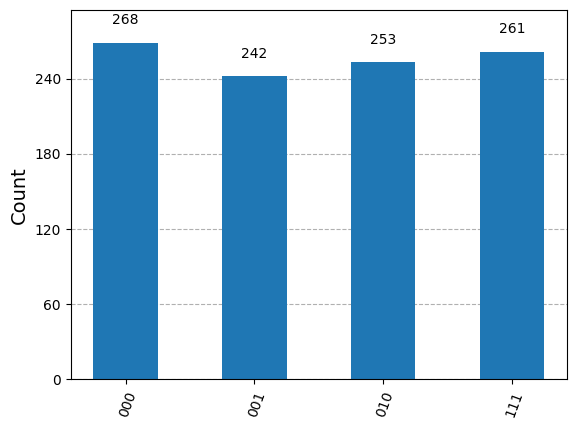

Bloch Sphere for Toffoli:


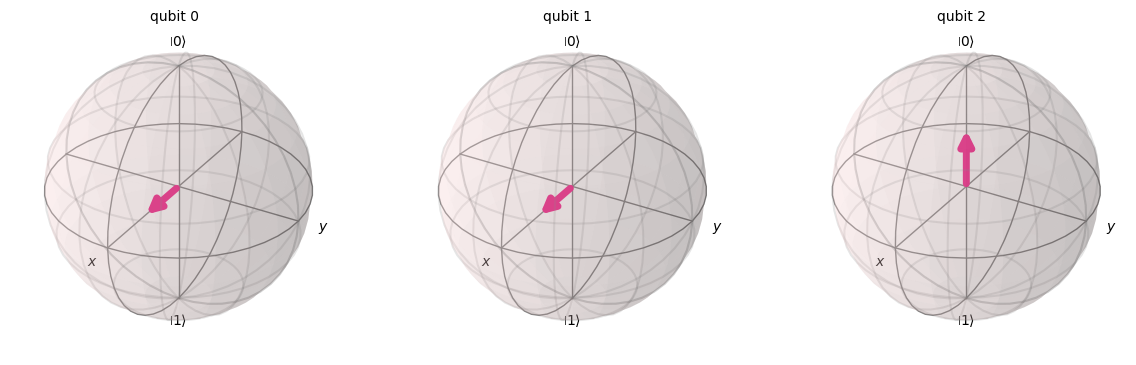

quantum circuit with Toffoli + CNOT:


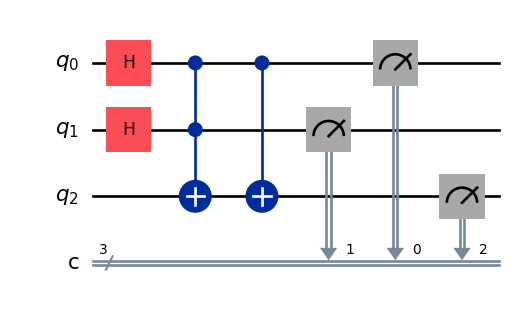

Measurement Results for Toffoli + CNOT:


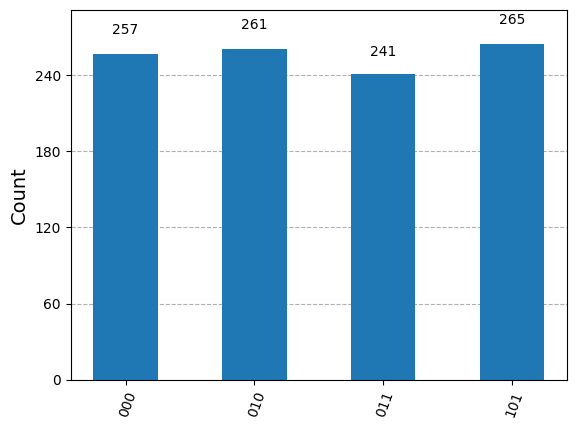

Bloch Sphere for Toffoli + CNOT:


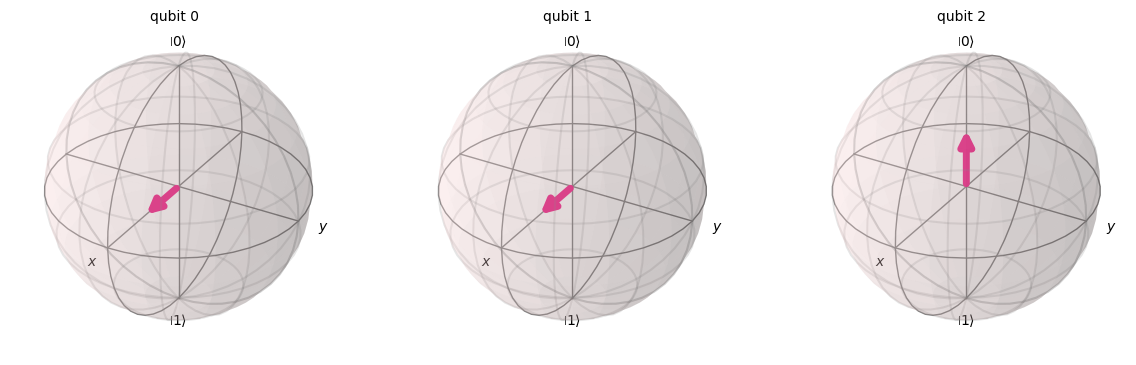

In [5]:
#Test Toffoli circuit
simulate_toffoli_circuit(use_cnot=False)  # Toffoli only
simulate_toffoli_circuit(use_cnot=True)   # Toffoli + CNOT